In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [8]:

import matplotlib.font_manager as font_manager
import matplotlib as mpl

from matplotlib import rcParams
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/Users/danielarisaro/Documents/Fundar/indice-mercado-trabajo-ingresos/'

# Fuente para los graficos
font_dir = [pathdata + 'basemaps/Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

rcParams['font.family'] = 'Archivo'

# Colores fundar
fundar_colores_primarios = ['#7BB5C4', '#9FC1AD', '#D3D3E0',  '#8d9bff', '#FF9750', '#FFD900',]
fundar_colores_secundarios = ['#B5E0EA', '#B3B3B3', '#848279', '#AFA36E', '#5D896F', '#9C9CBC', '#E27124']
fundar_white = '#F5F5F5'
fundar_black = '#151515'

In [1]:
from shapely import wkt
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [4]:
pathdata = '/Users/danielarisaro/Documents/MPP/Tesis Cambio Climático/'
filename = 'captura-puerto-flota-2019.csv'
df_pesca_puerto_flota_2019 = pd.read_csv(pathdata + filename, encoding="latin", delimiter=',',  on_bad_lines='skip')
filename = 'captura-puerto-flota-2010-2018.csv'
df_pesca_puerto_flota_2010_2018 = pd.read_csv(pathdata + filename, encoding="latin", delimiter=',',  on_bad_lines='skip')
df_pesca_puerto_flota = pd.concat([df_pesca_puerto_flota_2010_2018, df_pesca_puerto_flota_2019], axis=0)


In [5]:
df_total = pd.read_csv(pathdata + 'geodb.csv', index_col=[0])
df_total['geometry'] = df_total['geometry'].apply(wkt.loads)
gdf_total = gpd.GeoDataFrame(df_total, geometry='geometry', crs='epsg:4326')
gdf_total['centroid'] = gdf_total.centroid;
gdf_total['boundary'] = gdf_total.boundary
gdf_reprojected = gdf_total.to_crs("EPSG:3395")

/var/folders/dd/1s4l1xds2nq03hc9gbgh1fnw0000gn/T/ipykernel_81759/1324088544.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_total['centroid'] = gdf_total.centroid;


In [6]:
puertos_x_y = df_pesca_puerto_flota.groupby(['puerto'])[['latitud', 'longitud']].first()

In [9]:

# Directorio de los archivos .xlsx
directorio = "/home/daniufundar/Documents/Fundar/proyecto_pesca/data/Desembarques/"
directorio = '/Users/danielarisaro/Documents/Fundar/proyecto_pesca/data/Desembarques/'

In [23]:
puertos_desembarques_2023 = pd.read_csv(directorio + 'Puertos_desembarques_2023.csv', index_col=[0])


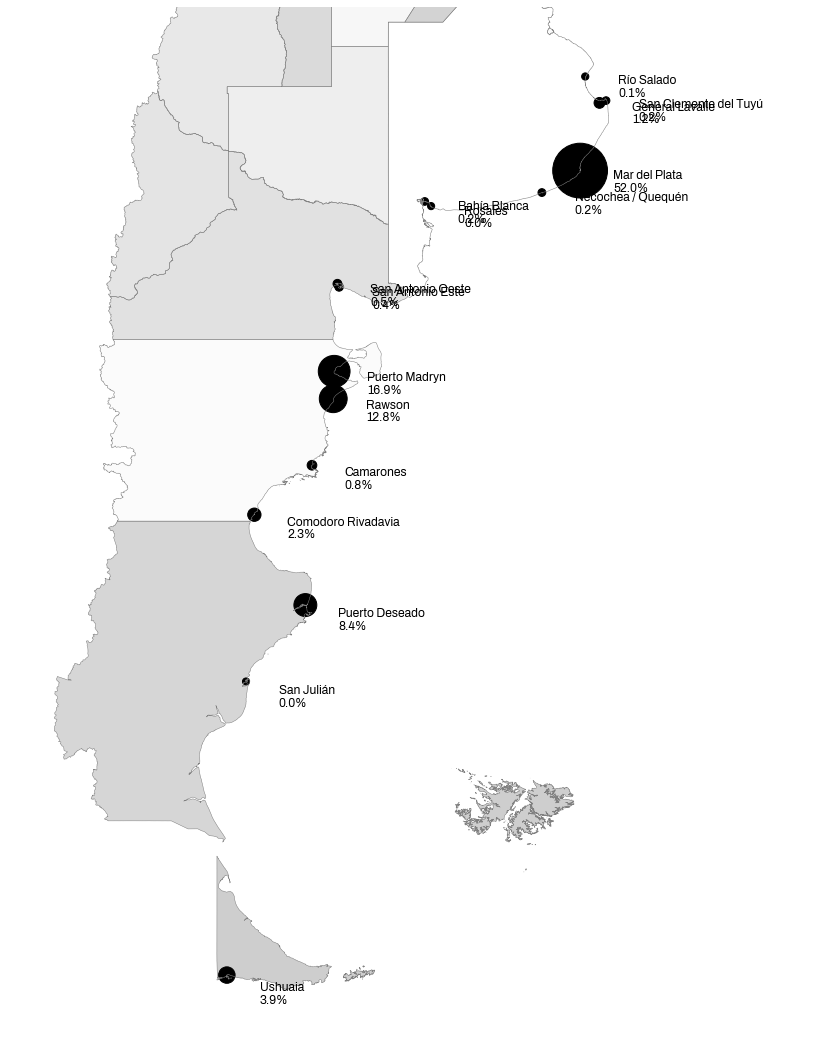

In [69]:
df = puertos_desembarques_2023.copy()

df['percentage_catch'] = df['desembarques'] / df['desembarques'].sum() * 100

min_size = 50  # minimum marker size
max_size = 3000  # maximum marker size
df['normalized_size'] = np.interp(df['percentage_catch'], (df['percentage_catch'].min(), df['percentage_catch'].max()), (min_size, max_size))

fig = plt.figure(figsize=(16, 16))

ax = plt.axes([0.05, 0.05, 0.9, 0.9], projection=ccrs.Mercator(), frameon=False)

lat_n = -34
ax.set_extent([lon_w, lon_e, lat_s, lat_n], crs=ccrs.PlateCarree())
ax.set_aspect('equal', 'box')

gdf_reprojected.plot(ax=ax, cmap='Greys', edgecolor='none', alpha=0.2)
gdf_reprojected.boundary.plot(ax=ax, color='gray', lw=0.5)
valid_indices = ~np.isnan(df['normalized_size'])

#sc = ax.scatter(df['longitud'][valid_indices], df['latitud'][valid_indices], s=df['normalized_size'][valid_indices], c=df['normalized_size'][valid_indices], marker='o', cmap='viridis_r', transform=ccrs.PlateCarree())

#cbar = plt.colorbar(sc, ax=ax, pad=0.02, orientation='vertical')
#cbar.set_label('Marker Size', fontsize=12)

ax.scatter(df['longitud'][valid_indices], df['latitud'][valid_indices], s=df['normalized_size'][valid_indices], marker='o', color='black', transform=ccrs.PlateCarree())

for i in range(len(df)):
    if valid_indices[i]:
        ax.text(df['longitud'].iloc[i] + 1, df['latitud'].iloc[i]-.5, f"{df.index[i]}\n{df['percentage_catch'].iloc[i]:.1f}%", color='black', fontsize=12, transform=ccrs.PlateCarree())


directorio_figs = '/Users/danielarisaro/Documents/Fundar/proyecto_pesca/figs/'
fig.savefig(directorio_figs + 'mapa_capturas.pdf', bbox_inches='tight', transparent=True)
fig.savefig(directorio_figs + 'mapa_capturas.png', dpi=400, bbox_inches='tight', transparent=True)


In [70]:
species_mapping = {
    'Merluza hubbsi GSM': 'Merluza hubbsi',
    'Merluza hubbsi N41 CTMFM': 'Merluza hubbsi',
    'Merluza hubbsi N41 ZEEA': 'Merluza hubbsi',
    'Merluza hubbsi S41': 'Merluza hubbsi',
    'Variado costero':'Variado costero',
    'Rayas (sin V. Cost)':'Rayas',
    'Langostino':'Langostino',
    'Calamar Illex':'Calamar Illex',
    'Abadejo':'Abadejo',
    'Merluza de cola':'Merluza de cola',
    'Merluza negra':'Merluza negra',
    'Centolla':'Centolla',
    'Polaca':'Polaca',
    'Anchoíta':'Anchoíta',
    'Vieira (callos)':'Vieira',
    'otras especies':'otras especies'
}

# Map the species to the grouped category in a new column
df_pesca_puerto_flota['grouped_species'] = df_pesca_puerto_flota['especie_agrupada'].map(species_mapping)


In [82]:
df_pesca_puerto_flota['fecha'] = pd.to_datetime(df_pesca_puerto_flota['fecha'])

In [90]:
evolucion_merluza = df_pesca_puerto_flota.groupby(['grouped_species', pd.to_datetime(df_pesca_puerto_flota['fecha']).dt.year])['captura'].sum().loc['Merluza hubbsi']
                      
evolucion_calamar = df_pesca_puerto_flota.groupby(['grouped_species', pd.to_datetime(df_pesca_puerto_flota['fecha']).dt.year])['captura'].sum().loc['Calamar Illex']

In [94]:
evolucion_calamar.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='fecha')

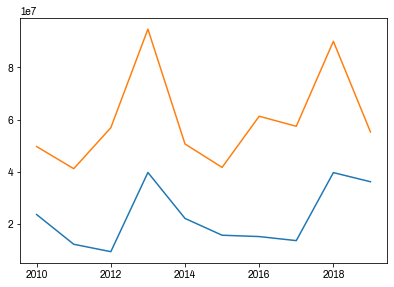

In [96]:
ax = plt.axes([0.05, 0.05, 0.85, 0.85])

line1 = ax.plot(evolucion_calamar)

line1 = ax.plot(evolucion_merluza)
